In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import altair as alt
import plotly
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



In [3]:
"""
No estuvimos pudiendo instalar las librerias altair y plotly, esta fue la solución que encontramos
"""

import sys
!{sys.executable} -m pip install altair vega_datasets
!{sys.executable} -m pip install plotly.express

In [4]:
df = pd.read_csv("ks-projects-201801.csv")
df.head(5) 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,378661.0,NaN,NaN,NaN,1074731191.988755,619086204.322633,5971.0,538263516.0,1075275634.0,1610148624.0,2147476221.0
name,378657,375764,New EP/Music Development,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,378661,159,Product Design,22314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_category,378661,15,Film & Video,63585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,378661,14,USD,295365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deadline,378661,3164,2014-08-08,705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goal,378661.0,NaN,NaN,NaN,49080.791521,1183391.259092,0.01,2000.0,5200.0,16000.0,100000000.0
launched,378661,378089,1970-01-01 01:00:00,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pledged,378661.0,NaN,NaN,NaN,9682.979339,95636.010005,0.0,30.0,620.0,4076.0,20338986.27
state,378661,6,failed,197719,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
"""
Las fechas ("deadline", "launched") son de tipo objeto, las cambiamos a tipo date eliminando las hora de "launched" 
para poder visualizarlas gráficamente más adelante.
"""


df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
print(df.dtypes)


ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object


In [8]:
"""
Eliminamos las columnas ID (no provee información relevante para el análisis), goal, pledged
(ambas son reemplazadas por sus valores ajustados a dolares en usd_pledged_real y usd_goal_real)
y la columna usd pledged (la columna usd_pledged real es la misma pero utilizando el mismo conversor
que para usd_goal_real)
"""

df = df.drop(["ID", "goal", "pledged", "usd pledged"], axis=1)
df.head()


,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00


In [13]:
"""
Creamos una columna "duration" donde se vea la duración del proyecto restando las columnas
'deadline' y 'launched'.
También creamos la columna launch(year) donde se visualice el año de lanzamiento de la campaña. Esto servirá
para poder realizar una más clara visualización de los datos.
"""

df['duration'] = (df['deadline'] - df['launched']).dt.days
df['launch_year']=pd.to_datetime(df['launched'], format="%Y/%m/%d").dt.year
df.head()

,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration(days),launch_year,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,58,2015,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,59,2017,59
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,44,2013,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,29,2012,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,55,2015,55


In [10]:
"""
Se buscó si hay datos repetidos. 
"""

duplicate_rows_df = df[df.duplicated()]
print("filas duplicadas: ", duplicate_rows_df.shape)

filas duplicadas:  (0, 13)


In [11]:
"""
Primero buscamos analizar el estado del total de las campañas para poder tener una primera 
impresión del éxito o fracaso de las mismas.
"""
state_count = df.state.value_counts()
state_count_use = pd.DataFrame({
    'State' : state_count.index,
    'Number of Campaigns' : state_count.values
})
alt.Chart(state_count_use, title = 'Campaigns State').mark_bar().encode(
    x = alt.X('State', sort = state_count.values, axis=alt.Axis(labelAngle=-45)) ,
    y='Number of Campaigns', 
    tooltip = ('Number of Campaigns')
).properties(width = 300)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [88]:
"""
Luego buscamos visualizar la distribución de las categorias principales
de las campañas. 
"""


main_categories = df.main_category.value_counts()
main_categories_use = pd.DataFrame({
    'Main Categories' : main_categories.index,
    'Number of Campaigns' : main_categories.values
})
alt.Chart(main_categories_use).mark_bar().encode(
    x = alt.X('Main Categories', sort = main_categories.values, axis =  alt.Axis(labelAngle=-45)),
    y = 'Number of Campaigns',
    tooltip = ('Number of Campaigns')
).properties(width = 400)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [87]:
"""
A partir de los resultados anteriores, buscamos ver si la distribución de categorías
se mantiene igual entre las campañas exitosas.
"""

successful = df.loc[df.state=='successful']
main_categories_success = successful.main_category.value_counts()
main_categories_success_use = pd.DataFrame({
    'Main Categories' : main_categories_success.index,
    'Number of Campaigns' : main_categories_success.values
})
alt.Chart(main_categories_success_use, title='Successful Campaigns').mark_bar().encode(
    x = alt.X('Main Categories', sort = main_categories.values, axis =  alt.Axis(labelAngle=-45)),
    y = 'Number of Campaigns',
    tooltip = ('Number of Campaigns')
).properties(width = 400)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [86]:
"""
Realizamos lo mismo para las campañas fallidas.
"""


failed = df.loc[df.state=='failed']
main_categories_failure = failed.main_category.value_counts()
main_categories_failure_use = pd.DataFrame({
    'Main Categories' : main_categories_failure.index,
    'Number of Campaigns' : main_categories_failure.values
})
alt.Chart(main_categories_failure_use, title='Failed Campaigns').mark_bar().encode(
    x = alt.X('Main Categories', sort = main_categories.values, axis =  alt.Axis(labelAngle=-45)),
    y = 'Number of Campaigns',
    tooltip = ('Number of Campaigns')
).properties(width = 400)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [26]:
"""
Buscamos entender la distribución de las campañas por año.
"""

launch_year = df.launch_year.value_counts()
launch_year_use = pd.DataFrame({
    'Launch Year' : launch_year.index,
    'Number of Campaigns' : launch_year.values
})

alt.Chart(launch_year_use, title= 'Campaigns by Year').mark_bar(size=35, clip=True).encode(
    alt.X('Launch Year', scale=alt.Scale(domain=(2009, 2017)), axis=alt.Axis(format='')),
    y='Number of Campaigns',
    tooltip = ('Number of Campaigns', 'Launch Year'),
    color=alt.Color('Launch Year', scale=alt.Scale(scheme='pastel1', domain=(2009, 2017)), legend=None)
).properties(width = 450)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [85]:
""""
También quisimos visualizar la distribución de países. 
"""


countries = df.country.value_counts()
countries_use = pd.DataFrame({
    'Countries' : countries.index,
    'Number of Campaigns' : countries.values
})
alt.Chart(countries_use).mark_bar().encode(
    x = alt.X('Countries', sort = countries.values, axis =  alt.Axis(labelAngle=-45)),
    y = 'Number of Campaigns',
    tooltip = ('Number of Campaigns')
).properties(width = 600)

/opt/homebrew/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [ ]:
"""
Pasando a datos más estadísticos buscamos la media,
el promedio y la cantidad máxima de dinero "invertido".

"""

avgamt = df.usd_pledged_real/df.backers

with pd.option_context('mode.use_inf_as_null', True):
    avgamt = avgamt.dropna()
medianamt = avgamt.median()
print("La media es : $%1.2f" %medianamt)
averageamt = avgamt.mean()
print("El promedio es : $%1.2f" %averageamt)
maxamt = avgamt.max()
print("El máximo invertido es : $%1.2f" %maxamt)

results = df.state.value_counts()
print(results)



In [29]:
print('The average Kickstarter campaign has {} USD pledged, {} backers and a goal of {} USD.'.format(round(df['usd_pledged_real'].mean(), 2),
                                                                                               int(df['backers'].mean()),
                                                                                               round(df['usd_goal_real'].mean(), 2)))

The average Kickstarter campaign has 9058.92 USD pledged, 105 backers and a goal of 45454.4 USD.


In [26]:
df['avg_pledged'] = df['usd_pledged_real'] / df['backers']


df['avg_pledged'].fillna(0, inplace=True)
df.replace(to_replace=[np.inf, -np.inf], value=0, inplace=True)

print('Kickstarter backers pledge {} USD to a campaign on average'.format(round(df['avg_pledged'].mean(), 2)))

Kickstarter backers pledge 64.58 USD to a campaign on average


,Technology,Design,Film & Video,Dance,Theater,Fashion,Food,Music,Art,Photography,Games,Publishing,Comics,Journalism,Crafts
avg_pledged,95.985817,94.35646,76.1804,70.725558,70.447174,63.856153,62.741457,55.035269,54.870922,52.693231,50.415755,47.763362,41.061157,38.083108,38.019355


Text(0, 0.5, 'Average pledged per backer (USD)')

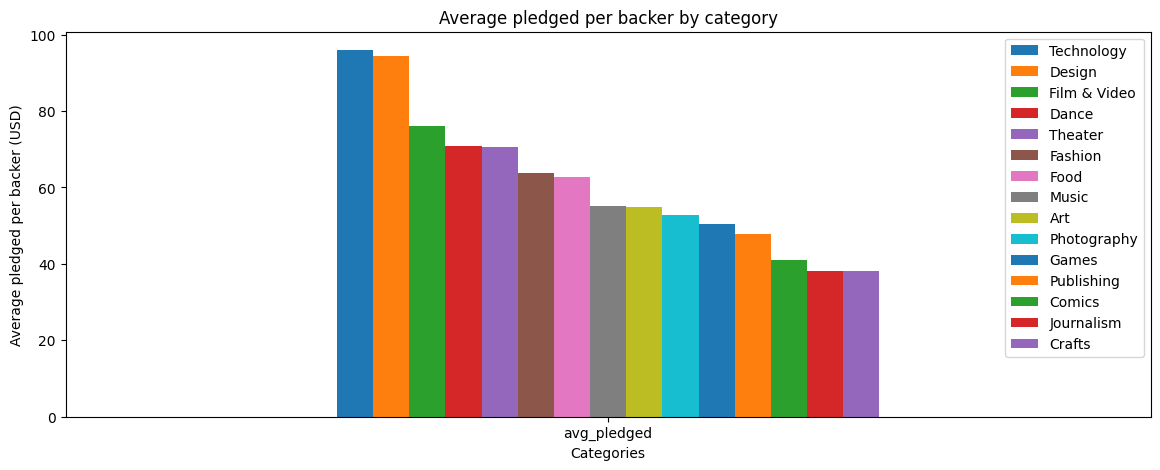

In [27]:
cat_list = list(df['main_category'].unique())
pledge_mapping = dict()
for category in cat_list:
    cat_df = df[df['main_category'] == category]
    pledge_mapping.update({category : cat_df['avg_pledged'].mean()})
    
# Visualize the results
pledge_df = pd.DataFrame(pledge_mapping, index=['avg_pledged'])
pledge_df.sort_values('avg_pledged', axis=1, inplace=True, ascending=False)
display(pledge_df.head())
ax = pledge_df.plot(kind='bar', 
                    title='Average pledged per backer by category', 
                    rot=0, figsize=(14,5))
ax.set_xlabel('Categories')
ax.set_ylabel('Average pledged per backer (USD)')
